<a href="https://colab.research.google.com/github/Arpitkamal/Deep-learning-Sigmoid-Neuron/blob/master/SigmoidNeuron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Plotting Sigmoid Function

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

$S_{w, b}(x) = \frac{1}{1+e^{-wx + b}}$

In [0]:
def sigmoid(x, w, b):
  return 1/(1+np.exp(-(w*x + b)))

In [3]:
sigmoid(1, 0.5, 0)

0.6224593312018546

In [0]:
w = 0.9    # responsible for the shape 
b = 0.1    # if we increase b it will shift towards right side
X = np.linspace(-10,10,100)
Y = sigmoid(X, w, b)

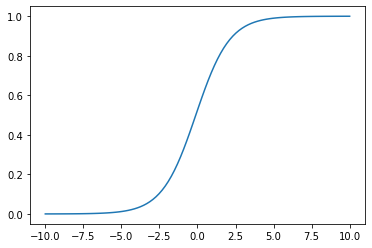

In [5]:
plt.plot(X,Y)
plt.show()

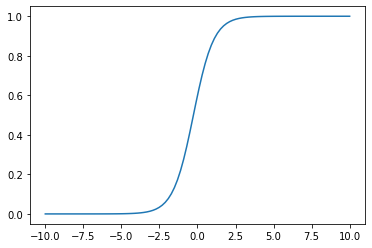

In [6]:
w = 1.5     #@param {type: "slider", min: -2, max: 2, step:0.1} 
b = 0.4     #@param {type: "slider", min: -2, max: 2, step:0.1}
X = np.linspace(-10,10,100)
Y = sigmoid(X, w, b)
plt.plot(X,Y)
plt.show()

**W - Controlling the rate at which it falling from one extreme to another extreme**

**B - Controlling position of this fall w.r.t 0**

$S_{W_1,W_2,b}(x_1,x_2) = \frac{1}{1 + e^{-(w_1x_1 + w_2x_2 + b)}}$

In [0]:
def sigmoid_2d(x1, x2, w1, w2, b):
  return 1/(1 + np.exp(-(w1*x1 + w2*x2 + b)))

In [8]:
sigmoid_2d(1, 0, 0.5, 0, 0)

0.6224593312018546

In [0]:
from mpl_toolkits import mplot3d

In [10]:
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)

X, Y = np.meshgrid(x, y)

print(x.shape, y.shape, X.shape, Y.shape)

(100,) (100,) (100, 100) (100, 100)


In [0]:
w1 = 0.5
w2 = 0.5
b = 1
Y1 = sigmoid_2d(X, Y, w1, w2, b)

In [0]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","yellow","green"])

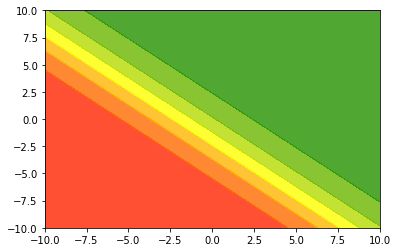

In [13]:
plt.contourf(X, Y, Y1, cmap = my_cmap, alpha = 0.8)
plt.show()

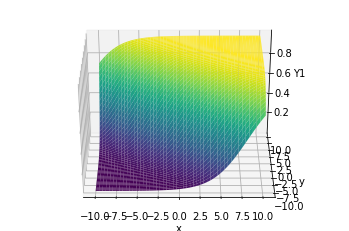

In [14]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Y1, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Y1');

ax.view_init(30, 270)

# Compute Loss for for Given Dataset

In [0]:
w_unknown = 0.5
b_unknown = 0.25

X = np.random.random(25) * 20 - 10
Y = sigmoid(X, w_unknown, b_unknown)

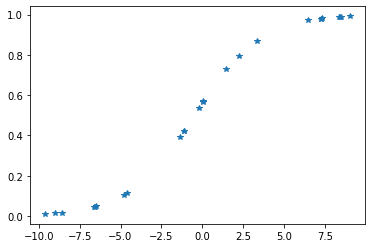

In [16]:
plt.plot(X, Y, '*')
plt.show()

In [0]:
def calculate_loss(X, Y, w_est, b_est):
  loss = 0
  for x, y in zip(X, Y):
    loss += (y - sigmoid(x, w_est, b_est)) **2
  return loss  

In [0]:
W = np.linspace(0, 2, 101)
B = np.linspace(-1, 1, 101)

WW, BB = np.meshgrid(W, B)

Loss = np.zeros(WW.shape)

In [0]:
for i in range(WW.shape[0]):
  for j in range(WW.shape[1]):
    Loss[i,j] = calculate_loss(X, Y, WW[i, j], BB[i, j])

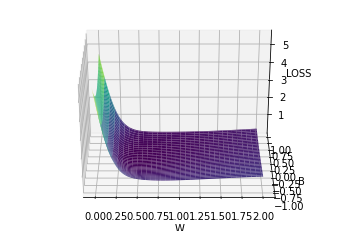

In [20]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(WW, BB, Loss, cmap='viridis')
ax.set_xlabel('W')
ax.set_ylabel('B')
ax.set_zlabel('LOSS');


ax.view_init(30, 270)     # 180 bias prospective, 270 weight prospective

In [0]:
ij = np.argmin(Loss)
i = int(np.floor(ij/Loss.shape[1]))
j = int(ij - i * Loss.shape[1])

In [22]:
print(i, j)

63 25


In [23]:
print(WW[i, j], BB[i, j])

0.5 0.26


# Class for Sigmoid Neuron

In [0]:
class SigmoidNeuron:

  def __init__(self):
    self.w = None
    self.b = None

  def perceptron(self, x):
    return np.dot(x, self.w.T) + self.b 

  def sigmoid(self, x):
    return 1.0/(1.0 + np.exp(-x))

  def grad_w(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1 - y_pred) * x 

  def grad_b(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1 - y_pred)

  def fit(self, X, Y, epochs=1, learning_rate=1, initialise=True):

    #initialise w, b
    if initialise: 
      self.w = np.random.randn(1, X.shape[1])
      self.b = 0

    for i in range(epochs):
      dw = 0
      db = 0
      for x, y in zip(X, Y):
        dw += self.grad_w(x, y)
        db += self.grad_b(x, y)
      self.w -= learning_rate * dw
      self.b -= learning_rate * db

# Fit for toy data

In [0]:
X = np.asarray([[2.5, 2.5], [4, -1], [1, -4], [-3, 1.25], [-2, -4], [1, 5]])
Y = [1, 1, 1, 0, 0, 0]

In [0]:
sn = SigmoidNeuron()
sn.fit(X, Y, 1, 0.5, True)

In [0]:
def plot_sn(X, Y, sn, ax):
  X1 = np.linspace(-10, 10, 100)
  X2 = np.linspace(-10, 10, 100)
  XX1, XX2 = np.meshgrid(X1, X2)
  YY = np.zeros(XX1.shape)
  for i in range(X2.shape[0]):
    for j in range(X1.size):
      val = np.asarray([X1[j], X2[i]])
      YY[i, j] = sn.sigmoid(sn.perceptron(val))
  ax.contourf(XX1, XX2, YY, cmap=my_cmap, alpha=0.6)
  ax.scatter(X[:,0],X[:,1], c=Y, cmap=my_cmap)
  ax.plot()

[[1.05854083 0.9187176 ]] [0.00209765]
[[1.10687015 0.78356628]] [0.02458855]
[[1.16220211 0.57846601]] [0.06425785]
[[1.23131081 0.25563219]] [0.12529785]
[[ 1.2566787  -0.09111661]] [0.14592099]
[[ 1.20891904 -0.46325114]] [0.07694648]
[[ 1.29154778 -0.39763808]] [0.01423141]
[[ 1.32022952 -0.47130215]] [-0.0449866]
[[ 1.37731101 -0.44792358]] [-0.09583003]
[[ 1.41051421 -0.48142397]] [-0.14305422]
[[ 1.45116684 -0.48314988]] [-0.18519056]
[[ 1.4841977  -0.49812509]] [-0.22404025]
[[ 1.51674822 -0.50691675]] [-0.25958015]
[[ 1.54661446 -0.51679441]] [-0.29241497]
[[ 1.57479973 -0.52564368]] [-0.32282157]
[[ 1.6013201  -0.53406558]] [-0.35110087]
[[ 1.62638424 -0.54201194]] [-0.37749158]
[[ 1.65013504 -0.54954362]] [-0.40220021]
[[ 1.67270028 -0.5566995 ]] [-0.42540327]
[[ 1.69419014 -0.5635145 ]] [-0.44725288]


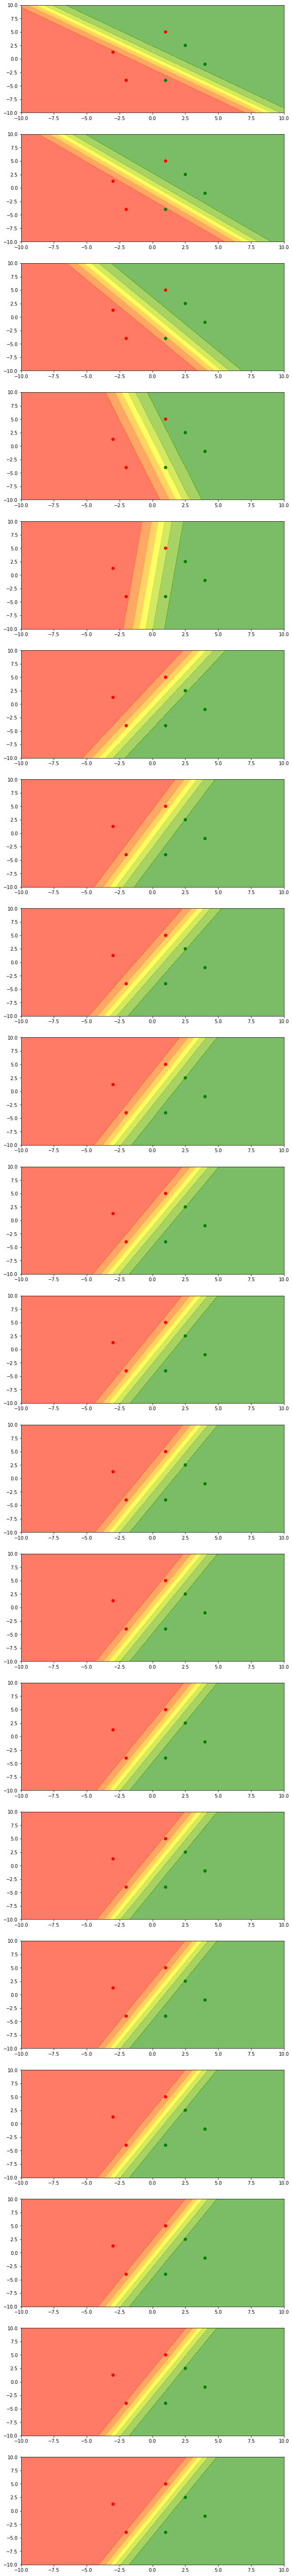

In [56]:
sn.fit(X, Y, 1, 0.05, True)
N = 20
plt.figure(figsize=(10, N*5))
for i in range(20):
  print(sn.w, sn.b)
  ax = plt.subplot(N, 1, i+1)
  plot_sn(X, Y, sn, ax)
  sn.fit(X, Y, 1, 0.5, False)

# Load Data

In [63]:
!ls

drive  mobile_cleaned.csv  sample_data


In [0]:
data = pd.read_csv('mobile_cleaned.csv')

In [65]:
data.head()

,PhoneId,Pixel Density,Screen Size,Weight,RAM,Processor_frequency,Screen to Body Ratio (calculated),Height,Internal Memory,Capacity,Resolution,SIM 2_2G,SIM 2_3G,SIM 2_4G,SIM 2_Other,Num_cores_312,Num_cores_Deca,Num_cores_Dual,Num_cores_Hexa,Num_cores_Octa,Num_cores_Other,Num_cores_Quad,Num_cores_Tru-Octa,Brand_10.or,Brand_Apple,Brand_Asus,Brand_Billion,Brand_Blackberry,Brand_Comio,Brand_Coolpad,Brand_Do,Brand_Gionee,Brand_Google,Brand_HTC,Brand_Honor,Brand_Huawei,Brand_InFocus,Brand_Infinix,Brand_Intex,Brand_Itel,...,Brand_Meizu,Brand_Micromax,Brand_Mobiistar,Brand_Moto,Brand_Motorola,Brand_Nokia,Brand_Nubia,Brand_OPPO,Brand_OnePlus,Brand_Oppo,Brand_Panasonic,Brand_Razer,Brand_Realme,Brand_Reliance,Brand_Samsung,Brand_Sony,Brand_Spice,Brand_Tecno,Brand_Ulefone,Brand_VOTO,Brand_Vivo,Brand_Xiaomi,Brand_Xiaomi Poco,Brand_Yu,Brand_iVooMi,os_name_Android,os_name_Blackberry,os_name_KAI,os_name_Nokia,os_name_Other,os_name_Tizen,os_name_iOS,"SIM Slot(s)_Dual SIM, GSM+CDMA","SIM Slot(s)_Dual SIM, GSM+GSM","SIM Slot(s)_Dual SIM, GSM+GSM, Dual VoLTE","SIM Slot(s)_Single SIM, GSM",Sim1_2G,Sim1_3G,Sim1_4G,Rating
0,0,403,6.26,182,4,1.8,80.68,157.9,64,4000,20,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,4.5
1,1,271,6.20,168,3,1.8,80.85,156.2,32,4230,8,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,4.5
2,2,409,6.30,168,3,2.1,83.68,157.0,32,3500,25,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,4.4
3,4,411,6.00,169,4,2.2,74.78,159.8,64,3300,24,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,4.3
4,5,396,6.50,175,4,2.2,84.23,160.4,64,3750,16,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,4.4


In [66]:
data.shape

(341, 88)

In [0]:
X = data.drop('Rating', axis=1)
Y = data['Rating'].values

In [69]:
X.head()

,PhoneId,Pixel Density,Screen Size,Weight,RAM,Processor_frequency,Screen to Body Ratio (calculated),Height,Internal Memory,Capacity,Resolution,SIM 2_2G,SIM 2_3G,SIM 2_4G,SIM 2_Other,Num_cores_312,Num_cores_Deca,Num_cores_Dual,Num_cores_Hexa,Num_cores_Octa,Num_cores_Other,Num_cores_Quad,Num_cores_Tru-Octa,Brand_10.or,Brand_Apple,Brand_Asus,Brand_Billion,Brand_Blackberry,Brand_Comio,Brand_Coolpad,Brand_Do,Brand_Gionee,Brand_Google,Brand_HTC,Brand_Honor,Brand_Huawei,Brand_InFocus,Brand_Infinix,Brand_Intex,Brand_Itel,...,Brand_Lyf,Brand_Meizu,Brand_Micromax,Brand_Mobiistar,Brand_Moto,Brand_Motorola,Brand_Nokia,Brand_Nubia,Brand_OPPO,Brand_OnePlus,Brand_Oppo,Brand_Panasonic,Brand_Razer,Brand_Realme,Brand_Reliance,Brand_Samsung,Brand_Sony,Brand_Spice,Brand_Tecno,Brand_Ulefone,Brand_VOTO,Brand_Vivo,Brand_Xiaomi,Brand_Xiaomi Poco,Brand_Yu,Brand_iVooMi,os_name_Android,os_name_Blackberry,os_name_KAI,os_name_Nokia,os_name_Other,os_name_Tizen,os_name_iOS,"SIM Slot(s)_Dual SIM, GSM+CDMA","SIM Slot(s)_Dual SIM, GSM+GSM","SIM Slot(s)_Dual SIM, GSM+GSM, Dual VoLTE","SIM Slot(s)_Single SIM, GSM",Sim1_2G,Sim1_3G,Sim1_4G
0,0,403,6.26,182,4,1.8,80.68,157.9,64,4000,20,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
1,1,271,6.20,168,3,1.8,80.85,156.2,32,4230,8,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,2,409,6.30,168,3,2.1,83.68,157.0,32,3500,25,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
3,4,411,6.00,169,4,2.2,74.78,159.8,64,3300,24,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
4,5,396,6.50,175,4,2.2,84.23,160.4,64,3750,16,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1


In [75]:
Y

array([4.5, 4.5, 4.4, 4.3, 4.4, 4.5, 4.3, 4.1, 4.3, 4.5, 4.5, 4. , 4.4,
       4.4, 4.4, 4.4, 4.5, 4.4, 4.4, 4.4, 4.4, 4.5, 4.4, 4.3, 4.2, 4.3,
       4.3, 4.6, 4.4, 4.5, 3.9, 4.2, 4.3, 4.2, 4.3, 4.3, 4.2, 4.4, 4.1,
       3.8, 4.4, 4.6, 4.3, 4.5, 4.5, 4.2, 3.9, 4.3, 4. , 4.3, 4.3, 3.9,
       4.2, 4.5, 4. , 4.6, 4.2, 2.8, 4.4, 4.3, 4.2, 4.4, 4.4, 4. , 4.4,
       4.4, 4.1, 4.5, 4.3, 3.9, 4.3, 4.1, 4.1, 4.2, 3.4, 4.2, 4.6, 3.8,
       4.3, 4.5, 4.2, 4.5, 4.5, 4. , 4.1, 4.4, 4.5, 4.1, 4.5, 4.3, 4.5,
       3.9, 3.9, 4.4, 4.4, 4.4, 4. , 4.1, 4.1, 4.4, 4.3, 4.3, 4.2, 4.3,
       3.4, 4.3, 4.3, 4.2, 4.6, 4.8, 4.4, 3.4, 3.7, 4.2, 4.3, 4.4, 4.3,
       4.2, 4.1, 4.3, 4. , 3.9, 4.4, 4.4, 3.9, 3.1, 3.7, 4.2, 4.4, 4. ,
       4. , 4.1, 4.2, 4.3, 4.2, 4.3, 4.1, 3.6, 4.1, 4. , 3.8, 3.7, 4.3,
       4.1, 4.1, 4.5, 4. , 4.3, 3.6, 4.1, 4.5, 3.5, 4. , 4.3, 4.6, 3.5,
       3.9, 4.1, 3.9, 3.8, 4.4, 4.3, 4. , 3.9, 4.4, 4.7, 3.9, 4.5, 3.7,
       4. , 4.3, 4.1, 4.8, 4.1, 4. , 4.7, 4. , 4.1, 4. , 3.4, 4.

In [0]:
threshold = 4
data['Class'] = data['Rating'] >= threshold

In [0]:
data['Class']

In [0]:
threshold = 4.2
data['Class'] = (data['Rating'] >= threshold).astype(np.int)

In [0]:
data['Class']

In [88]:
data['Class'].value_counts(normalize=True)

0    0.533724
1    0.466276
Name: Class, dtype: float64

In [0]:
Y_binarised = data['Class'].values

# Standardisation

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
R = np.random.random([100, 1])

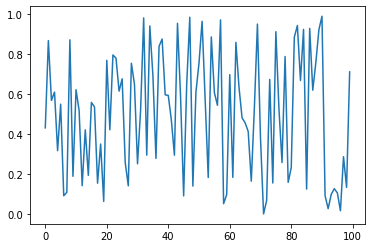

In [92]:
plt.plot(R)
plt.show()

In [93]:
np.mean(R)

0.502480274303133

In [94]:
np.std(R)

0.3021596326523107

In [0]:
scaler = StandardScaler()

In [97]:
scaler.fit(R)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [98]:
scaler.mean_

array([0.50248027])

In [0]:
RT = scaler.transform(R)

In [100]:
np.mean(RT)

1.6653345369377347e-17

In [101]:
np.std(RT)

0.9999999999999998

In [102]:
np.std(RT)

0.9999999999999998

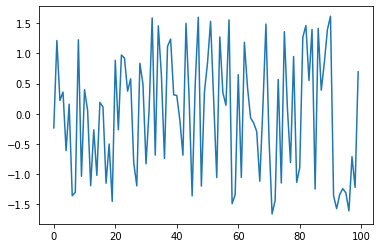

In [103]:
plt.plot(RT)
plt.show()